# Chi-Squared Distribution

The $\chi^2$ distribution, sometimes also called the variance distribution, is mathematically expressed as follows

$$ \Chi_{n-1} \sim \dfrac{\displaystyle \sum_{i=1}^{N} (X_i - \bar{X})^2 }{\sigma^2} $$

where
- $X_i$ is a sample from a normally distributed $X$

<br/><br/>

If we plot the variance of a sample of a normally distributed data, it will assume a chi-square distribution.

<br/><br/>

### PDF and CDF of $\chi^2$

The PDF of the Chi-Squared distribution is

$$f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{(k/2)-1} e^{-x/2}$$

The CDF of the Chi-Square distribution is given by

$$ CDF_{\text{chi-squared}} = \int_{-\infty}^{x} f(x; k) \:dx = \frac{1}{\Gamma(\frac{k}{2})} \gamma\left(\frac{k}{2}, \frac{x}{2}\right) $$

where
- $k$ is degrees of freedom
- $\Gamma(z) = \displaystyle \int_0^\infty t^{z-1} e^{-t} \, dt$ is the general case of factorial
- $\gamma(s, x) = \displaystyle \int_0^x t^{s-1} e^{-t} \, dt$ is the lower incomplete gamma function

<br/><br/>

### Example (1) Goodness-of-Fit

This example demonstrates how to use the chi-squared goodness-of-fit test to compare the frequencies of two samples. <br/><br/>

Suppose a retail store has 5 models of a product, and their sale frequency is indicated in `april_sales` and `may_sales`. <br/><br/>

They wish to compare the variance of frequencies in the sales reported in these 2 months. <br/><br/>
 We assume the change is not statistically significant if the p-value > alpha = 0.05.



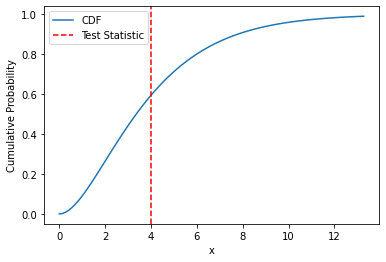

Chi-squared statistic: 4.013843999138117
Degrees of freedom: 4
p-value: 0.40413551038510453


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Observed frequencies for each model for the month of April
april_sales = np.array([29, 40, 30, 35, 20])

# Observed frequencies for each model for the month of May
may_sales = np.array([28, 32, 26, 30, 17])

# Compute the chi-squared test statistic
chi2_stat = np.sum((april_sales - may_sales)**2 / may_sales)

# Determine the degrees of freedom (number of categories - 1)
df = len(april_sales) - 1

# Compute the p-value
p_value = 1.0 - chi2.cdf(chi2_stat, df)

# Plot the CDF of the chi-squared distribution
x = np.linspace(0, chi2.ppf(0.99, df), 100)  # Adjust the range as needed
cdf = chi2.cdf(x, df)
plt.plot(x, cdf, label="CDF")

# Plot a vertical line at the test statistic
plt.axvline(x=chi2_stat, color='red', linestyle='--', label="Test Statistic")

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

# Display the plot
plt.show()

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("Degrees of freedom:", df)
print("p-value:", p_value)
